# Analysis of 2015 CCHRC Air Source Heat Pump Study Data

In [30]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

In [31]:
rcParams['figure.figsize']= (9, 6)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

## Dillingham Mitsubishi Mini-Split Analysis

In [32]:
fn = 'data/Dillingham_DLG_DHP_TenSecond.dat'
# Take a look at the header rows
f = open(fn)
for i in range(5):
    print(f'Line {i}: {f.readline().strip()}')

Line 0: "TOA5","Dillingham","CR1000","27206","CR1000.Std.27","CPU:ASHP DHP 2014.CR1","34100","DLG_DHP_TenSecond"
Line 1: "TIMESTAMP","RECORD","DLG_DeliveryT1_F","DLG_DeliveryT2_F","DLG_DeliveryT3_F","DLG_ReturnT1_F","DLG_ReturnT2_F","DLG_ReturnT3_F","DLG_CoilT_F","DLG_OutsideT_F","DLG_Electricity_W_Avg","DLG_Airflow_fpm_Avg"
Line 2: "TS","RN","","","","","","","","","",""
Line 3: "","","Smp","Smp","Smp","Smp","Smp","Smp","Smp","Smp","Avg","Avg"
Line 4: "2014-10-04 18:03:20",0,49.86922,49.72235,49.672,49.88553,49.8515,49.86922,30.51785,30.51633,"NAN",0.1071669


In [33]:
dfd = pd.read_csv(fn, skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], na_values=['NAN'])
dfd.head()

,TIMESTAMP,RECORD,DLG_DeliveryT1_F,DLG_DeliveryT2_F,DLG_DeliveryT3_F,DLG_ReturnT1_F,DLG_ReturnT2_F,DLG_ReturnT3_F,DLG_CoilT_F,DLG_OutsideT_F,DLG_Electricity_W_Avg,DLG_Airflow_fpm_Avg
0,2014-10-04 18:03:20,0,49.86922,49.72235,49.67200,49.88553,49.85150,49.86922,30.51785,30.51633,NaN,0.107167
1,2014-10-04 18:03:30,1,66.49229,66.29536,66.22681,66.50751,66.45961,66.48685,40.68156,40.71555,NaN,0.107660
2,2014-10-04 18:03:40,2,66.49229,66.28444,66.23115,66.50316,66.45311,66.48466,40.70706,40.77493,NaN,0.106630
3,2014-10-04 18:03:50,3,66.48685,66.27574,66.23115,66.50208,66.44226,66.47047,40.71556,40.72401,NaN,0.105903
4,2014-10-04 18:04:00,4,66.49120,66.27900,66.23115,66.49229,66.43791,66.46939,40.69735,40.64272,NaN,0.107903


In [34]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819915 entries, 0 to 1819914
Data columns (total 12 columns):
TIMESTAMP                datetime64[ns]
RECORD                   int64
DLG_DeliveryT1_F         float64
DLG_DeliveryT2_F         float64
DLG_DeliveryT3_F         float64
DLG_ReturnT1_F           float64
DLG_ReturnT2_F           float64
DLG_ReturnT3_F           float64
DLG_CoilT_F              float64
DLG_OutsideT_F           float64
DLG_Electricity_W_Avg    float64
DLG_Airflow_fpm_Avg      float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 166.6 MB


In [35]:
# Look at some statistics for periods when the unit is producing heat
# Shows the differences between the 3 Supply and 3 Return temperature sensors.
dfd[dfd.DLG_DeliveryT2_F > 90].describe()

,RECORD,DLG_DeliveryT1_F,DLG_DeliveryT2_F,DLG_DeliveryT3_F,DLG_ReturnT1_F,DLG_ReturnT2_F,DLG_ReturnT3_F,DLG_CoilT_F,DLG_OutsideT_F,DLG_Electricity_W_Avg,DLG_Airflow_fpm_Avg
count,1.328640e+05,132864.000000,132864.000000,132864.000000,132864.000000,132864.000000,132864.000000,132864.000000,132864.000000,132824.000000,132861.000000
mean,8.803918e+05,118.292658,118.756996,117.716718,75.976813,75.777930,75.135330,18.672206,22.127792,1395.705347,129.450783
std,4.120417e+05,12.378342,12.603702,12.449153,3.937349,4.087278,4.000935,11.820563,11.685911,544.248456,44.788585
min,1.070000e+02,89.506120,90.000400,85.558620,57.241420,58.100550,58.441460,-13.566730,-11.171270,6.844549,0.118378
25%,5.629818e+05,108.162075,108.574800,107.740700,73.310570,73.048037,72.508432,10.567710,14.957830,1016.134500,90.514200
50%,9.596815e+05,121.151250,121.697000,120.544200,76.329260,76.050315,75.386550,20.799135,24.105240,1263.040500,114.601500
75%,1.193161e+06,128.816700,129.503900,128.270400,78.765280,78.513805,77.830950,27.764770,31.332420,1881.032250,173.650900
max,1.684904e+06,143.329700,144.701400,143.018900,88.703350,108.228600,103.896000,116.098900,41.915710,2390.890000,241.238700


In [36]:
# Calculate average delivery and return temperatures, and clean up DataFrame
# renaming columns to shorter names.
dfd['t_delivery'] = (dfd.DLG_DeliveryT1_F + dfd.DLG_DeliveryT2_F + dfd.DLG_DeliveryT3_F) / 3.0
dfd['t_return'] = (dfd.DLG_ReturnT1_F + dfd.DLG_ReturnT2_F + dfd.DLG_ReturnT3_F) / 3.0
dfd.drop(columns=['RECORD', 'DLG_DeliveryT1_F', 'DLG_DeliveryT2_F', 'DLG_DeliveryT3_F', 'DLG_ReturnT1_F', 'DLG_ReturnT2_F', 'DLG_ReturnT3_F'], inplace=True)
dfd.rename(columns={
    'DLG_CoilT_F': 't_coil',
    'DLG_OutsideT_F': 't_out',
    'DLG_Electricity_W_Avg': 'power',
    'DLG_Airflow_fpm_Avg': 'airspeed',
    'TIMESTAMP': 'ts',
}, inplace=True)
dfd.set_index('ts', inplace=True)
dfd.describe()

,t_coil,t_out,power,airspeed,t_delivery,t_return
count,1.819915e+06,1.819915e+06,1.818550e+06,1.819674e+06,1.819915e+06,1.819915e+06
mean,2.897679e+01,2.890385e+01,1.150438e+02,1.226483e+01,6.938441e+01,6.660027e+01
std,1.105391e+01,1.090487e+01,3.968522e+02,3.794369e+01,1.444734e+01,4.193026e+00
min,-1.676911e+01,-1.211544e+01,-6.378184e+00,-9.511621e+00,1.628906e+01,1.641421e+01
25%,2.344835e+01,2.335494e+01,4.890676e+00,1.820209e-01,6.417661e+01,6.443917e+01
50%,3.154517e+01,3.124205e+01,5.214241e+00,2.004053e-01,6.547210e+01,6.567928e+01
75%,3.629568e+01,3.633908e+01,5.610726e+00,2.932821e-01,6.723580e+01,6.751149e+01
max,1.203533e+02,6.334097e+01,2.394634e+03,4.978166e+02,1.436833e+02,1.018910e+02


Average Delivery delta-T when Off: -0.29


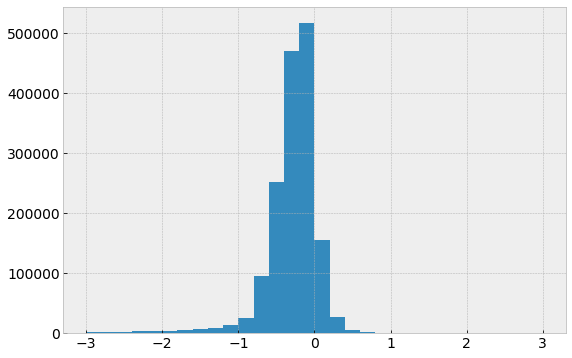

In [37]:
# Check calibration of Delivery and Return Temp Sensors.
# They should be pretty close to each other when heat pump is off.
df_off = dfd.query('power < 100')
delta_t = df_off.t_delivery - df_off.t_return
# also knock out large delta-T's
delta_t = delta_t.where(np.abs(delta_t) < 3)
print(f'Average Delivery delta-T when Off: {delta_t.mean():.2f}')
delta_t.hist(bins=30)

In [38]:
# How important is accurate delta-T?  What is the average delta-T
# when the unit is On?
df_on = dfd.query('power >= 100')
delta_t = df_on.t_delivery - df_on.t_return
print(delta_t.mean())

# About 38 deg delta-T.  So inaccuracy of 0.3 out of 38 F is about
# 1%.  No big deal if you are looking at the COP just during the On
# periods.

38.03481030971885


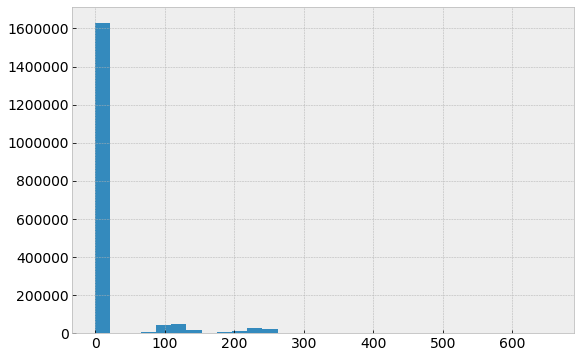

In [39]:
# Compute Air Flow in CFM from calibration data
# Calibration data from:  data/scripts/DLG - calibrating proxy 2015-01-11 - final.xlsx
airflow = 1.3083 * dfd.airspeed + 5.1391         # Air flow in cfm from proxy calibration
nonzero_speed = (dfd.airspeed > 40)              # Speed less than 40 fpm counts as zero speed
dfd['airflow'] = airflow * nonzero_speed         # Zero speed means zero flow
dfd.airflow.hist(bins=30)

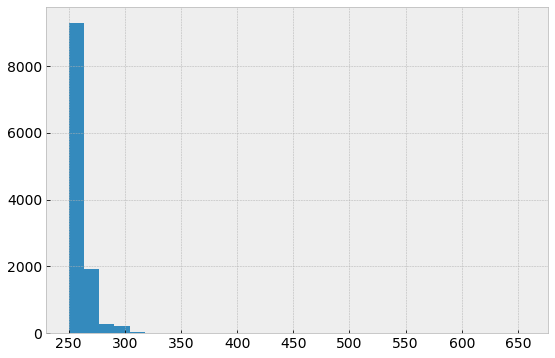

In [40]:
# Look like there may be some outliers
dfd.query('airflow > 250').airflow.hist(bins=30)

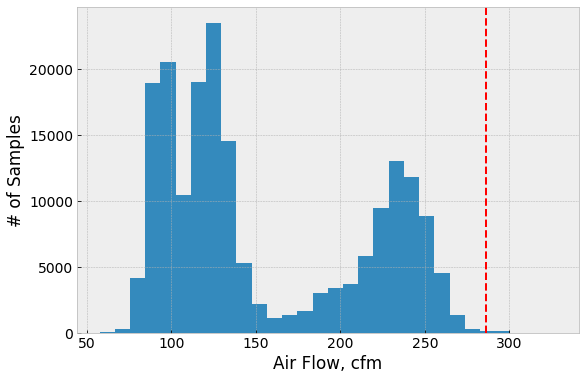

In [41]:
# Substitute NaN for values over 330
dfd['airflow'] = dfd.airflow.where(dfd.airflow < 330)
dfd.query('airflow > 0').airflow.hist(bins=30)
xlabel('Air Flow, cfm')
ylabel('# of Samples')
axvline(x=286, linestyle='--', color='red')
# Very few points reach the high speed calibration value.  Unit ran on
# High a fair amount, so should see value in that vicinity.
# Also, Mitsubishi Specs for Air Flow are:
#   Powerful: 381 cfm
#   High    : 367 cfm
#   Medium  : 240 cfm
#   Low     : 166 cfm
# Quite a bit higher than the peak observed in the following graph.
# Although other researchers have observed flow rates less than 
# specs as well.

In [42]:
# Calculate Heat Output in Watts

# Constants:
c_p = 0.240 # Specific heat of air in Btu/lb-F
ro = 0.0749   # Density of air (in lb/ft^3) at standard conditions
VHC = c_p*ro  # Volumetric heat capacity of air in Btu/ft^3-F

dfd['heat_out'] = dfd.airflow * (dfd.t_delivery - dfd.t_return) * VHC * 60 / 3.412

# Eliminate the coil temp column
dfd2 = dfd.drop(columns=['t_coil'])

# drop the rows that have one or more NaNs
dfd2.dropna(inplace=True)

dfd2.describe()
# Looking at the overall mean power and heat_out, COP is 1.56 for the
# entire period, counting periods when the heat pump is Off.
# That matches the value on page 48 of the report.

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
count,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06
mean,2.890042e+01,1.150542e+02,1.226907e+01,6.938634e+01,6.660027e+01,1.617940e+01,1.796342e+02
std,1.090656e+01,3.968734e+02,3.794333e+01,1.445127e+01,4.193893e+00,5.120451e+01,6.869030e+02
min,-1.211544e+01,-6.378184e+00,-8.598010e-01,1.628906e+01,1.641421e+01,0.000000e+00,-1.270581e+03
25%,2.335200e+01,4.890688e+00,1.820817e-01,6.417654e+01,6.443862e+01,0.000000e+00,-0.000000e+00
50%,3.123535e+01,5.214248e+00,2.004224e-01,6.547210e+01,6.567888e+01,0.000000e+00,-0.000000e+00
75%,3.634177e+01,5.610736e+00,2.932767e-01,6.723584e+01,6.751153e+01,0.000000e+00,-0.000000e+00
max,6.334097e+01,2.394634e+03,2.465348e+02,1.436833e+02,1.018910e+02,3.276806e+02,4.836101e+03


In [43]:
# Date to start for the graph in the next cell.
dt = datetime(2014, 10, 5)

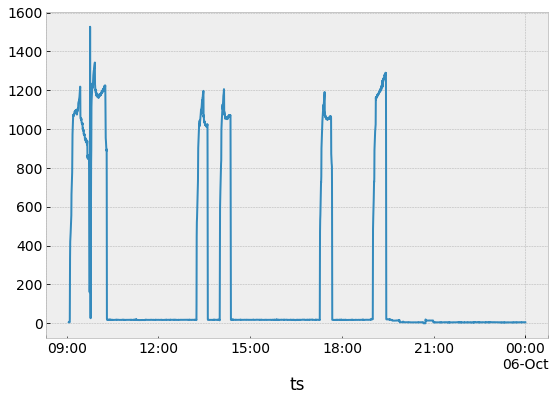

In [44]:
# Step through the days looking at the heat pump power consumption
# across the day.
dfd[dt.strftime('%Y-%m-%d')].power.plot()
dt += timedelta(days=1)

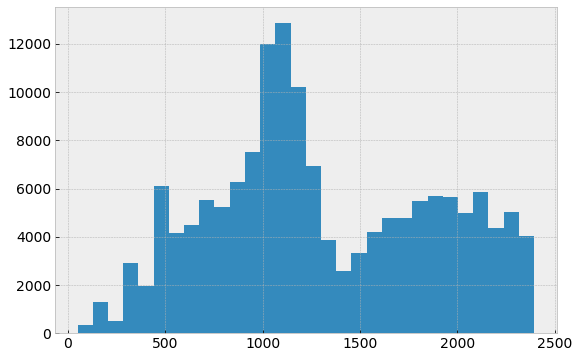

In [45]:
dfd2.query('power > 50').power.hist(bins=30)

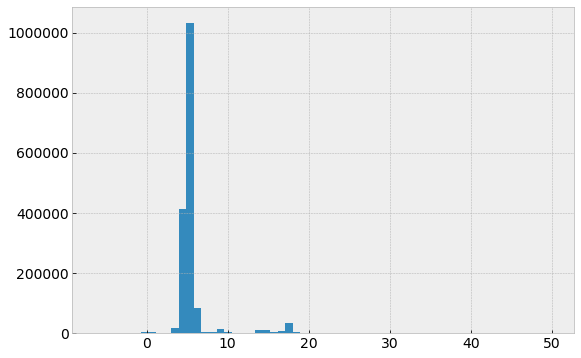

In [46]:
# Look at Power Consumption when the heat pump is essentially off
dfd2.query('power <= 50').power.hist(bins=60)

In [47]:
dfd2.query('airspeed > 40').head()

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
ts,,,,,,,
2014-10-04 18:17:00,40.13540,20.01131,81.48087,66.274317,66.317117,111.740522,-1.511784
2014-10-04 18:17:10,40.17805,19.02945,79.31525,66.322180,66.285550,108.907242,1.261040
2014-10-04 18:17:20,40.07320,52.37772,73.07473,66.314917,66.271403,100.742769,1.385707
2014-10-04 18:17:30,40.00608,295.97850,76.00609,66.260883,66.251100,104.577868,0.323416
2014-10-04 18:17:40,40.01583,406.67120,77.21709,64.986887,66.165847,106.162219,-39.564378


In [48]:
dfd2.describe()

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
count,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06,1.818299e+06
mean,2.890042e+01,1.150542e+02,1.226907e+01,6.938634e+01,6.660027e+01,1.617940e+01,1.796342e+02
std,1.090656e+01,3.968734e+02,3.794333e+01,1.445127e+01,4.193893e+00,5.120451e+01,6.869030e+02
min,-1.211544e+01,-6.378184e+00,-8.598010e-01,1.628906e+01,1.641421e+01,0.000000e+00,-1.270581e+03
25%,2.335200e+01,4.890688e+00,1.820817e-01,6.417654e+01,6.443862e+01,0.000000e+00,-0.000000e+00
50%,3.123535e+01,5.214248e+00,2.004224e-01,6.547210e+01,6.567888e+01,0.000000e+00,-0.000000e+00
75%,3.634177e+01,5.610736e+00,2.932767e-01,6.723584e+01,6.751153e+01,0.000000e+00,-0.000000e+00
max,6.334097e+01,2.394634e+03,2.465348e+02,1.436833e+02,1.018910e+02,3.276806e+02,4.836101e+03


In [49]:
# Function to average over some 'interval_string' time period,
# and then plot Power against outdoor temperature.
def plot_avg_power(df, interval_string):
    df_avg = df.resample(interval_string).mean()
    df_avg.plot(x='t_out', y='power', kind='scatter')

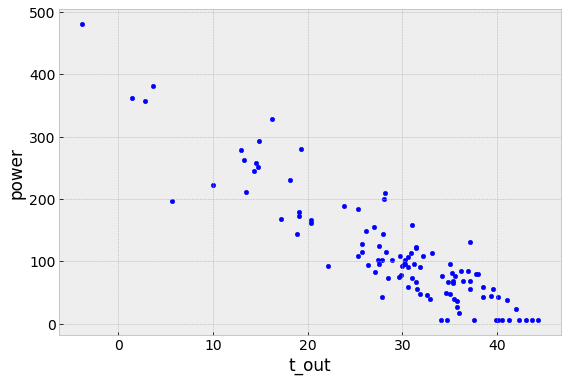

In [50]:
# Experiment with different averaging intervals to see where the data settles down.
plot_avg_power(dfd2, '2D')

(0, 3)

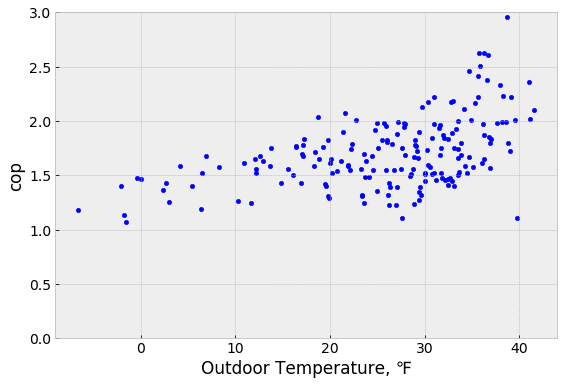

In [51]:
# Do 1 day averages and compute COP for those intervals
# Look at filtering out the low power readings so that the COP
# only considers time periods when the heat pump is running. Looking
# at On periods is more consistent with operation in a normal load home,
# as opposed to the very low load home Tom has.
# NEED TO NOTE this when I present this graph.
power_threshold = 25   # Watts required to consider the unit running
dfd2_1day = dfd2.query('power >= @power_threshold').resample('1D').mean()
dfd2_1day['cop'] = dfd2_1day.heat_out / dfd2_1day.power
dfd2_1day.plot(x='t_out', y='cop', kind='scatter')
xlabel('Outdoor Temperature, ℉')
ylim(0,3)

In [52]:
# Calculate seasonal average COP, only looking at periods when heat
# pump is on.
dfd2_mean = dfd2.query('power >= @power_threshold').mean()
dfd2_mean.heat_out / dfd2_mean.power

1.6276589010031357

### Create Standard COP vs. Binned Temperature Plot

(0, 3.0)

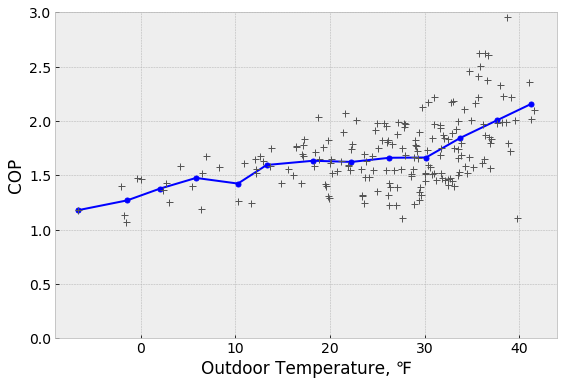

In [53]:
dfb = dfd2_1day.copy()

# calculate the bin for each row.  4 degree bins
dfb['temp_bin'] = dfb['t_out'] // 4.0

# average by bins
dfa = dfb.groupby('temp_bin').mean()
dfa = dfa[['t_out', 'cop']]
dfa.columns = ['temperature', 'cop']
plot(dfa.temperature, dfa.cop, 'b-', marker='o', markersize=5)
plot(dfd2_1day.t_out, dfd2_1day.cop, linestyle='None', color='#555555', marker='+', markersize=7)
xlabel('Outdoor Temperature, ℉')
ylabel('COP')
ylim(0, 3.0)


In [54]:
dfa['source'] = 'CCHRC - Dillingham'
dfa['field_study'] = True
dfa['hspf'] = 10.0
dfa.to_pickle('temp_cop_cchrc_dillingham.pkl')
dfa

,temperature,cop,source,field_study,hspf
temp_bin,,,,,
-2.0,-6.628883,1.177788,CCHRC - Dillingham,True,10.0
-1.0,-1.408751,1.268600,CCHRC - Dillingham,True,10.0
0.0,2.026514,1.376003,CCHRC - Dillingham,True,10.0
1.0,5.858913,1.475082,CCHRC - Dillingham,True,10.0
2.0,10.286588,1.423151,CCHRC - Dillingham,True,10.0
3.0,13.319837,1.594087,CCHRC - Dillingham,True,10.0
4.0,18.238119,1.633112,CCHRC - Dillingham,True,10.0
5.0,22.276661,1.622248,CCHRC - Dillingham,True,10.0
6.0,26.293289,1.660477,CCHRC - Dillingham,True,10.0


## Wrangell Fujitsu Mini-Split Analysis

In [55]:
fn = 'data/Wrangell_WRG_DHP_TenSecond.dat'
dfd = pd.read_csv(fn, skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], na_values=['NAN'])
dfd.head()

,TIMESTAMP,RECORD,WRG_DeliveryT1_F,WRG_DeliveryT2_F,WRG_DeliveryT3_F,WRG_ReturnT1_F,WRG_ReturnT2_F,WRG_ReturnT3_F,WRG_CoilT_F,WRG_OutsideT_F,WRG_Electricity_W_Avg,WRG_Airflow_fpm_Avg
0,2014-10-23 17:12:40,87685,92.22947,92.49622,92.47194,72.97411,73.01828,72.99625,44.07870,46.22718,281.0522,228.9279
1,2014-10-23 17:12:50,87686,92.18102,92.44771,92.37492,72.96307,72.96307,72.99625,44.12632,46.21543,280.3951,231.6602
2,2014-10-23 17:13:00,87687,92.10845,92.37492,92.27797,72.91896,72.89693,72.95209,44.18576,46.21543,280.2745,233.6551
3,2014-10-23 17:13:10,87688,92.01167,92.27797,92.18102,72.86375,72.84173,72.88589,44.15005,46.21543,279.5667,231.4393
4,2014-10-23 17:13:20,87689,91.92702,92.16899,92.06001,72.84173,72.83069,72.84173,44.09062,46.19203,278.7143,231.8267


In [56]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894017 entries, 0 to 1894016
Data columns (total 12 columns):
TIMESTAMP                datetime64[ns]
RECORD                   int64
WRG_DeliveryT1_F         float64
WRG_DeliveryT2_F         float64
WRG_DeliveryT3_F         float64
WRG_ReturnT1_F           float64
WRG_ReturnT2_F           float64
WRG_ReturnT3_F           float64
WRG_CoilT_F              float64
WRG_OutsideT_F           float64
WRG_Electricity_W_Avg    float64
WRG_Airflow_fpm_Avg      float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 173.4 MB


In [57]:
# Calculate average delivery and return temperatures, and clean up DataFrame
# renaming columns to shorter names.
dfd['t_delivery'] = (dfd.WRG_DeliveryT1_F + dfd.WRG_DeliveryT2_F + dfd.WRG_DeliveryT3_F) / 3.0
dfd['t_return'] = (dfd.WRG_ReturnT1_F + dfd.WRG_ReturnT2_F + dfd.WRG_ReturnT3_F) / 3.0
dfd.drop(columns=['RECORD', 'WRG_DeliveryT1_F', 'WRG_DeliveryT2_F', 'WRG_DeliveryT3_F', 'WRG_ReturnT1_F', 'WRG_ReturnT2_F', 'WRG_ReturnT3_F'], inplace=True)
dfd.rename(columns={
    'WRG_CoilT_F': 't_coil',
    'WRG_OutsideT_F': 't_out',
    'WRG_Electricity_W_Avg': 'power',
    'WRG_Airflow_fpm_Avg': 'airspeed',
    'TIMESTAMP': 'ts',
}, inplace=True)
dfd.set_index('ts', inplace=True)

In [58]:
# Report states that the valid data period is 12/3/2014 - 5/7/2015
dfd = dfd['2014-12-03' : '2015-05-07'].copy()
dfd.head()

,t_coil,t_out,power,airspeed,t_delivery,t_return
ts,,,,,,
2014-12-03 00:00:00,32.01714,34.11437,671.7827,257.7634,100.243697,71.746703
2014-12-03 00:00:10,31.93705,34.17952,671.5795,258.9703,100.317113,71.735717
2014-12-03 00:00:20,32.04383,34.16650,672.9813,254.7502,100.399217,71.790793
2014-12-03 00:00:30,32.17715,34.21864,673.5237,254.2584,100.498667,71.823843
2014-12-03 00:00:40,32.29702,34.24467,674.0789,257.2520,100.567900,71.845893


In [59]:
dfd.describe()

,t_coil,t_out,power,airspeed,t_delivery,t_return
count,1.347840e+06,1.347840e+06,1.347501e+06,1.347817e+06,1.347555e+06,1.347840e+06
mean,3.819411e+01,4.017264e+01,3.654417e+02,2.344510e+02,9.137895e+01,7.196337e+01
std,7.430915e+00,7.544865e+00,2.178758e+02,5.234132e+01,8.935761e+00,2.048089e+00
min,1.124018e+01,1.530188e+01,-9.988680e-01,-8.738692e+00,-2.336363e+02,3.402789e+01
25%,3.414046e+01,3.601968e+01,2.648371e+02,2.278293e+02,8.925726e+01,7.068612e+01
50%,3.872380e+01,4.072067e+01,3.040915e+02,2.493017e+02,9.167096e+01,7.199485e+01
75%,4.199207e+01,4.426777e+01,4.369576e+02,2.603819e+02,9.474466e+01,7.298466e+01
max,7.783194e+01,7.808056e+01,2.271355e+03,4.320764e+02,1.285385e+02,1.223997e+02


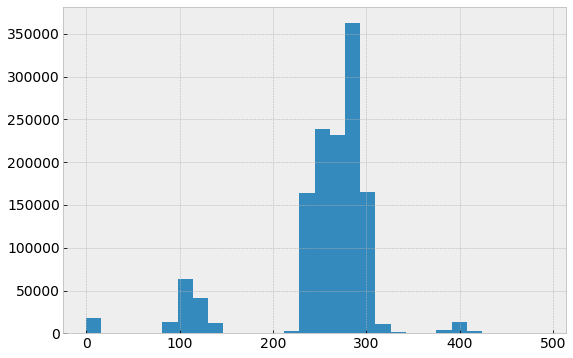

In [60]:
# Compute Air Flow in CFM from calibration data
# Calibration data from:  data/scripts/ASHP_WRG.m
airflow = 1.1922 * dfd.airspeed - 26.052         # Air flow in cfm from proxy calibration
nonzero_speed = (dfd.airspeed > 40)              # Speed less than 40 fpm counts as zero speed
dfd['airflow'] = airflow * nonzero_speed         # Zero speed means zero flow
dfd.airflow.hist(bins=30)

In [61]:
# Calculate Heat Output in Watts

# Constants:
c_p = 0.240 # Specific heat of air in Btu/lb-F
ro = 0.0749   # Density of air (in lb/ft^3) at standard conditions
VHC = c_p*ro  # Volumetric heat capacity of air in Btu/ft^3-F

dfd['heat_out'] = dfd.airflow * (dfd.t_delivery - dfd.t_return) * VHC * 60 / 3.412

# Eliminate the coil temp column
dfd2 = dfd.drop(columns=['t_coil'])

# drop the rows that have one or more NaNs
dfd2.dropna(inplace=True)

dfd2.describe()
# Looking at the overall mean power and heat_out, COP is 4.52 for the
# entire period.  That matches the value on page 48 of the report.

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
count,1.347194e+06,1.347194e+06,1.347194e+06,1.347194e+06,1.347194e+06,1.347194e+06,1.347194e+06
mean,4.016786e+01,3.654404e+02,2.345066e+02,9.138393e+01,7.196140e+01,2.538456e+02,1.652168e+03
std,7.531142e+00,2.178757e+02,5.222240e+01,8.930549e+00,2.019717e+00,6.087992e+01,7.136020e+02
min,1.530188e+01,-9.988680e-01,2.403590e-01,-2.336363e+02,4.855814e+01,0.000000e+00,-2.954954e+04
25%,3.602369e+01,2.648372e+02,2.278396e+02,8.925966e+01,7.068632e+01,2.455784e+02,1.423503e+03
50%,4.072067e+01,3.040909e+02,2.493116e+02,9.167270e+01,7.199496e+01,2.711773e+02,1.653516e+03
75%,4.426578e+01,4.369556e+02,2.603887e+02,9.474506e+01,7.298427e+01,2.843834e+02,2.004320e+03
max,7.808056e+01,2.271355e+03,4.320764e+02,1.285385e+02,1.128910e+02,4.890695e+02,5.858422e+03


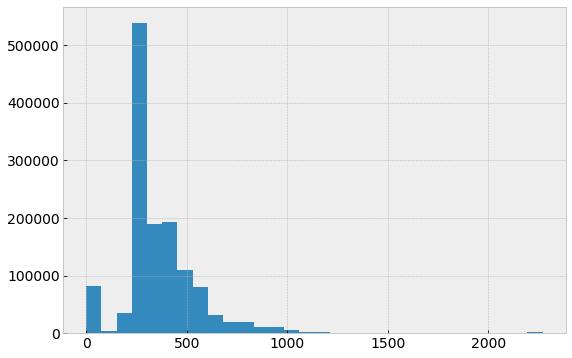

In [62]:
dfd2.power.hist(bins=30)

(0, 1032.3082589362539)

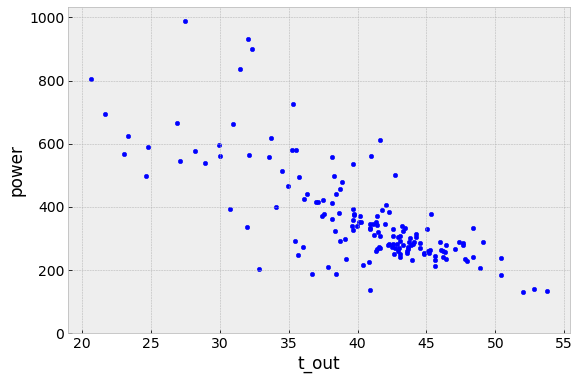

In [63]:
# Experiment with different averaging intervals to see where the data settles down.
plot_avg_power(dfd2, '1D')
ylim(0)

Text(0.5, 0, 'Outdoor Temperature, ℉')

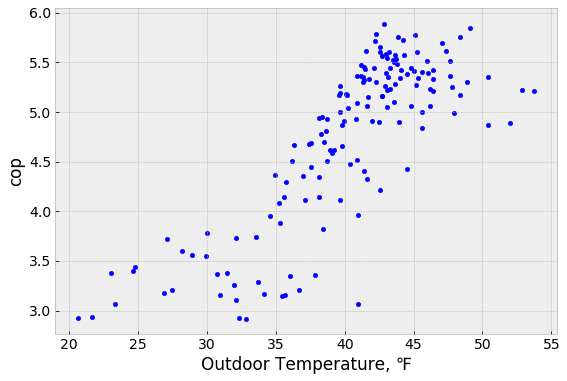

In [64]:
# Do 1 day averages and compute COP for those intervals
dfd2_1day = dfd2.resample('1D').mean()
dfd2_1day['cop'] = dfd2_1day.heat_out / dfd2_1day.power
dfd2_1day.plot(x='t_out', y='cop', kind='scatter')
xlabel('Outdoor Temperature, ℉')

In [65]:
# Calculate seasonal average COP
# This matches the value in the report on page 48.
dfd2_mean = dfd2.mean()
dfd2_mean.heat_out / dfd2_mean.power

4.521031389389859

### Create Standard COP vs. Binned Temperature Plot

Text(0, 0.5, 'COP')

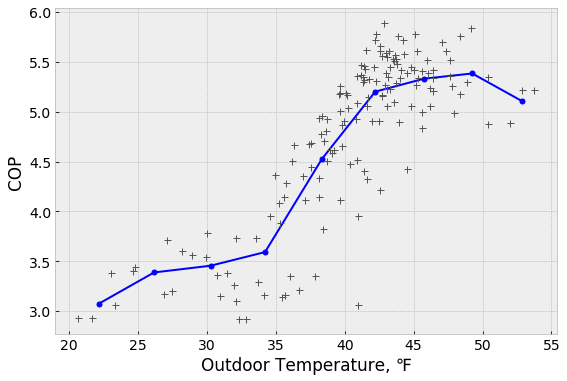

In [72]:
dfb = dfd2_1day.copy()

# calculate the bin for each row.  4 degree bins
dfb['temp_bin'] = dfb['t_out'] // 4.0

# average by bins
dfbin = dfb.groupby('temp_bin').mean()
dfa = dfbin[['t_out', 'cop']]
dfa.columns = ['temperature', 'cop']
plot(dfa.temperature, dfa.cop, 'b-', marker='o', markersize=5)
plot(dfd2_1day.t_out, dfd2_1day.cop, linestyle='None', color='#555555', marker='+', markersize=7)
xlabel('Outdoor Temperature, ℉')
ylabel('COP')

The downward slope of COP above 46 F may be due to cycling.  The report shows an example of cycling on page 46.  That sample occurred at 49.4 F outdoors, a temperature in the downward portion of the above curve.  The Kaluza heat pump (without the external thermostat) showed the same characteristic, but a lower outdoor temperature due to the low load of the building.

In [73]:
dfa['source'] = 'CCHRC - Wrangell'
dfa['field_study'] = True
dfa['hspf'] = 12.0
dfa.to_pickle('temp_cop_cchrc_wrangell.pkl')
dfa

/home/tabb99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/tabb99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/tabb99/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,temperature,cop,source,field_study,hspf
temp_bin,,,,,
5.0,22.159828,3.075466,CCHRC - Wrangell,True,12.0
6.0,26.161144,3.388308,CCHRC - Wrangell,True,12.0
7.0,30.271630,3.455993,CCHRC - Wrangell,True,12.0
8.0,34.215167,3.592493,CCHRC - Wrangell,True,12.0
9.0,38.338114,4.525006,CCHRC - Wrangell,True,12.0
10.0,42.210129,5.200390,CCHRC - Wrangell,True,12.0
11.0,45.763943,5.330910,CCHRC - Wrangell,True,12.0
12.0,49.253170,5.382815,CCHRC - Wrangell,True,12.0
13.0,52.869474,5.105568,CCHRC - Wrangell,True,12.0


### Look at the Amount of Heat Load Accessed by the Unit

This is done in order to estimate the amount of heat load
accessed by the unit.  An important issue in the heat pump modeling
is how the heat distribution of the space limits the amount of heat
that can be used from the heat pump.

(0, 3310.8619992196154)

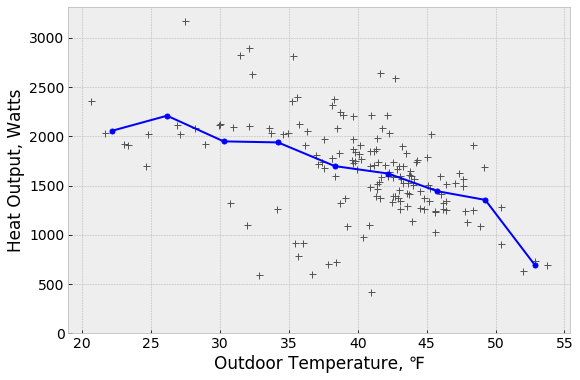

In [74]:
plot(dfd2_1day.t_out, dfd2_1day.heat_out, linestyle='None', color='#555555', marker='+', markersize=7)
xlabel('Outdoor Temperature, ℉')
ylabel('Heat Output, Watts')
plot(dfbin.t_out, dfbin.heat_out, 'b-', marker='o', markersize=5)
ylim(0)

In [75]:
# Look at the slope of those various segments to calculate the
# the incremental heat loss coefficient of the space served
# by the heat pump.
dfbin['ua'] = - dfbin.heat_out.diff() / dfbin.t_out.diff()
dfbin[['t_out', 'ua']]

,t_out,ua
temp_bin,,
5.0,22.159828,NaN
6.0,26.161144,-38.282147
7.0,30.271630,63.339416
8.0,34.215167,2.683939
9.0,38.338114,58.330443
10.0,42.210129,19.551473
11.0,45.763943,50.263488
12.0,49.253170,25.406029
13.0,52.869474,183.672553


In [76]:
# Not very conclusive.  At warm temperature (46 - 53 F), looks like space has
# a pretty large UA:  112 W / F or 382 Btu/hour/F.
# Ignoring a number of the low output points that occur from 20 - 35 F,
# there seems to be a slope going from (27 F, 3000 W) to (52 F, 700 W).
# This is a UA of:
ua = (3000 - 700) / (52 - 27)
f'{ua:.0f} W/F, {ua * 3.412:.0f} Btu/hr/F'

'92 W/F, 314 Btu/hr/F'

In [77]:
# Instead, lets look at the Heat Output at 25 F, by interpolating the
# binned values.
out_25 = np.interp(25.0, dfbin.t_out, dfbin.heat_out)
print(f'{out_25:.0f} W, {out_25 * 3.412:.0f} Btu/hr')

# Also show the implied UA.  The balance point for this building looks
# like 60 F, so delta-T is 35 F.
print(f'{out_25 * 3.413 / 35.0:.0f} Btu/hr/F')

# We are not doing this for the Dillingham building because that
# building is very low load, and the output at 25 F is surely the
# total building load, not limited by heat distribution issues.

2164 W, 7384 Btu/hr
211 Btu/hr/F
